<a href="https://colab.research.google.com/github/Kim-Min-Gyeong/study-mldl/blob/main/DNN_model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

패션 MNIST 데이터 셋을 적재하고, 훈련 세트와 검증 세트로 분리

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
#모델 생성

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28))) #1차원으로 변환해서 층 생성
    model.add(keras.layers.Dense(100, activation='relu')) #활성화 함수 relu, 은닉층

    if a_layer: #model_fn 함수에 (a_layer)로 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가함
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model



In [9]:
#a_layer로 층을 추가하지 않고 단순 호출
model = model_fn()
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#fit 메소드의 결과를 history에 담기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)


In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


손실과 정확도가 포함되어 있다. <br>
케라스는 에포크마다 손실을 계산<br>
정확도는 compile()에서 metrics 매개변수에 'accuracy'를 추가했기 때문에, history 속성에 포함<br>
history에 있는 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트이다.

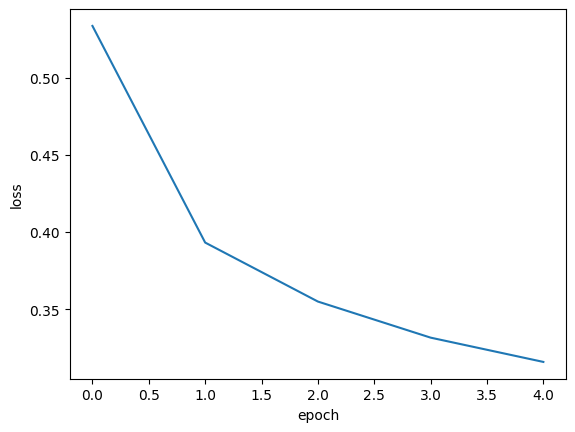

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

에포크마다의 손실을 그림

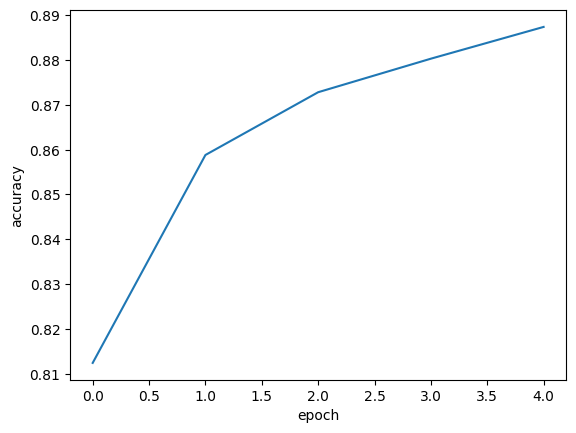

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크마다의 정확도를 그림

에포크마다 손실이 감소하고, 정확도는 향상됨. <br>
그렇다면 에포크를 늘려서 더 훈련하면 손실이 더 줄지 않을까?

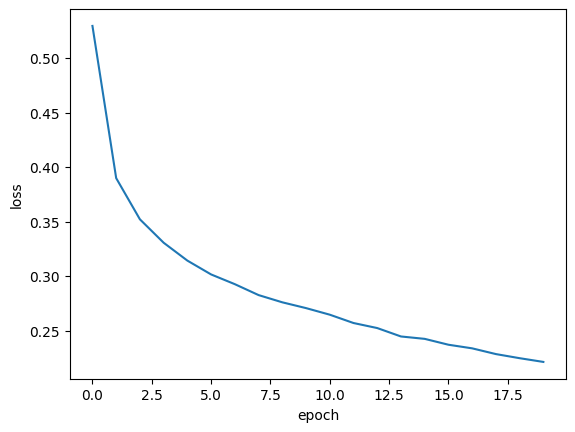

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0) #에포크 20으로 변경

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

예상대로 손실이 감소했다!

이번엔 검증 손실을 계산하기 위해 검증 세트에 대한 점수도 계산한다.

In [17]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) #validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달


In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


검증 세트에 대한 손실과 정확도도 포함되어 있다.

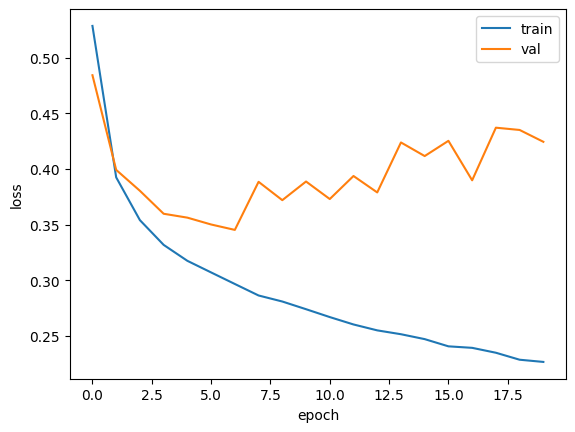

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

초기에 검증 손실이 줄어들다가 5번째 에포크만에 다시 상승. <br>
훈련 손실은 꾸준히 감소하기 때문에, 전형적인 과대적합 모델이 만들어진다. <br>
검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다.

옵티마이저 하이퍼파라미터를 조정해 과대적합을 완화시킬 수 있는지 알아보자

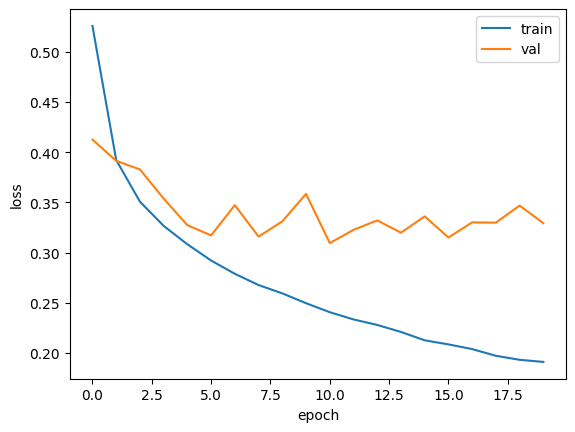

In [20]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') #adam 옵티마이저 사용
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) #validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대 적합은 줄고, 검증 손실 그래프도 10번째 에포크까지 전반적인 감소 추세이다.

In [48]:
#드롭아웃 적용

model = model_fn(keras.layers.Dropout(0.3)) #30%정도를 드롭아웃,어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만든다.
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               78500     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


은닉층 뒤에 추가된 드롭아웃 층은 훈련되는 모델 파라미터가 없다. <br>
입출력의 크기가 같다. <br>
일부 뉴런의 출력을 0으로 만들지만, 전체 출력 배열의 크기르 바꾸지는 않는다.

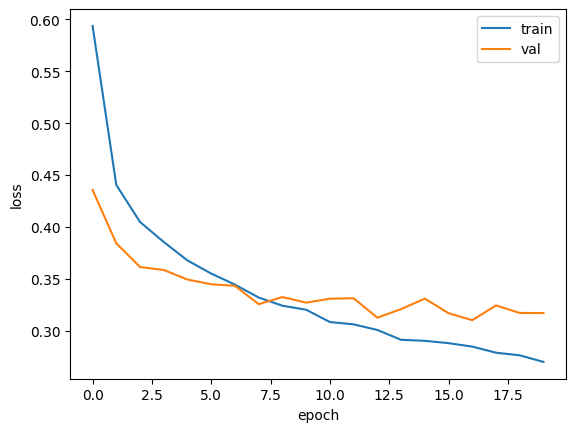

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') #adam 옵티마이저 사용
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) #validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 확실히 줄었다. <br>
10번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지되고 있다.

이 모델은 20번의 에포크 동안 훈련해서 과대적합되어 있다. <br>
에포크 횟수를 10으로 하고 다시 훈련<br>
훈련 하기 전, 모델을 저장

In [50]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') #adam 옵티마이저 사용
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target)) #validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

model.save_weights('model-weights.h5') #훈련된 모델의 파라미터를 저장
model.save('model-whole.h5') #모델 구조와 모델 파라미터를 함께 저장

!ls -al *.h5

-rw-r--r-- 1 root root 981176 Jan 27 07:02 best-model.h5
-rw-r--r-- 1 root root 333320 Jan 27 07:17 model-weights.h5
-rw-r--r-- 1 root root 981176 Jan 27 07:17 model-whole.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


훈련하지 않은 새로운 모델을 생성하고, model-weights.h5에서 훈련된 모델 파라미터를 읽어서 사용

In [51]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

이 모델의 검증 정확도를 확인해보자! <br>
케라스에서 예측을 수행하는 predict()는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환한다.

In [52]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1) #predict 결과에서 가장 큰 값을 고름, axis가 -1은 배열의 마지막 차원을 따라 최댓값을 고른다.
print(np.mean(val_labels == val_target)) #타깃 레이블과 비교하여 정확도 계산, 두 배열에서 각 위치의 값이 같으면 1, 다르면 0이다. 이를 평균하면 정확도


375/375 [==============================] - 1s 2ms/step
0.8814166666666666


In [53]:
#모델 전체를 파일에서 읽은 다음, 검증 세트의 정확도를 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8814


[0.3308098316192627, 0.8814166784286499]

In [54]:
#콜백 적용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') #adam 옵티마이저 사용
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
#모델이 훈련한 후, best-model.h5에 최상의 검증 점수를 낸 모델이 저장

In [55]:
model = keras.models.load_model('best-model.h5') #모델을 읽어옴
model.evaluate(val_scaled, val_target) #예측

375/375 [==============================] - 1s 2ms/step - loss: 0.3138 - accuracy: 0.8855


[0.31381407380104065, 0.8855000138282776]

ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해주었다.

In [56]:
#조기 종료 EarlyStopping 콜백 적용

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') #adam 옵티마이저 사용
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) #2번 연속 검증 점수가 향상되지 않으면 훈련 중지. 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
#가장 낮은 검증 손실의 모델을 파일에 저장하고, 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다.
#또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌림.

In [57]:
print(early_stopping_cb.stopped_epoch)

10


11번째 에포크에서 훈련이 중지되었다는 것을 의미. 최상위 모델은 11번째 에포크

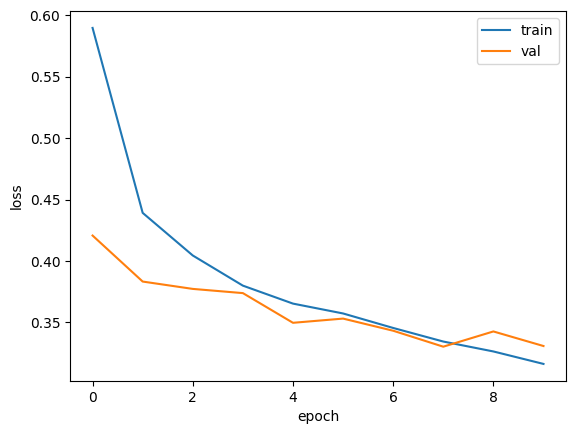

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [59]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3221 - accuracy: 0.8824


[0.32214173674583435, 0.8824166655540466]